In [6]:
import pandas as pd
from pathlib import Path
import rasterio
import rasterio.mask
from rasterio.plot import show_hist
from rasterio.plot import show

import rasterstats
from descartes import PolygonPatch

from matplotlib import pyplot as plt
import geojson
from shapely.geometry import Point, mapping, shape
from fiona import collection
import fiona
import geopandas as gpd

from geojson import Point, Feature, FeatureCollection, dump

In [2]:
shape_file_folder = Path.cwd().parent.parent.joinpath('data', 'GADM', 'Senegal')
#print(shape_file_folder)
shape_file_name = "gadm36_SEN_2.shp"
shape_file_path = Path(shape_file_folder).joinpath(shape_file_name)
print(shape_file_path)

C:\FoodSecurityInSenegal\GPSDD-Food-Security-Senegal\data\GADM\Senegal\gadm36_SEN_2.shp


In [3]:
Senegal_df = gpd.read_file(str(shape_file_path))

In [14]:
Senegal_df

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,SEN,Senegal,SEN.1_1,Dakar,None,SEN.1.1_1,Dakar,None,None,Département,Department,11,SN.DK.DK,"MULTIPOLYGON (((-17.46736 14.65097, -17.46736 ..."
1,SEN,Senegal,SEN.1_1,Dakar,None,SEN.1.2_1,Guédiawaye,None,None,Département,Department,14,SN.DK.GD,"POLYGON ((-17.40012 14.75731, -17.40051 14.757..."
2,SEN,Senegal,SEN.1_1,Dakar,None,SEN.1.3_1,Pikine,None,None,Département,Department,12,SN.DK.PK,"POLYGON ((-17.39897 14.73781, -17.39903 14.737..."
3,SEN,Senegal,SEN.1_1,Dakar,None,SEN.1.4_1,Rufisque,Rufisque-Bargny,None,Département,Department,13,SN.DK.RF,"POLYGON ((-17.16949 14.63201, -17.16952 14.632..."
4,SEN,Senegal,SEN.2_1,Diourbel,None,SEN.2.1_1,Bambey,None,None,Département,Department,31,SN.DB.BB,"POLYGON ((-16.37093 14.60763, -16.37140 14.607..."
5,SEN,Senegal,SEN.2_1,Diourbel,None,SEN.2.2_1,Diourbel,None,None,Département,Department,32,SN.DB.DB,"POLYGON ((-16.16108 14.55332, -16.16127 14.553..."
6,SEN,Senegal,SEN.2_1,Diourbel,None,SEN.2.3_1,Mbacké,M'Back,None,Département,Department,33,SN.DB.MK,"MULTIPOLYGON (((-15.84110 15.00658, -15.84053 ..."
7,SEN,Senegal,SEN.3_1,Fatick,None,SEN.3.1_1,Fatick,None,None,Département,Department,91,SN.FK.FK,"POLYGON ((-16.71913 13.99567, -16.71953 13.995..."
8,SEN,Senegal,SEN.3_1,Fatick,None,SEN.3.2_1,Foundiougne,None,None,Département,Department,92,SN.FK.FD,"MULTIPOLYGON (((-16.63903 13.68069, -16.63903 ..."
9,SEN,Senegal,SEN.3_1,Fatick,None,SEN.3.3_1,Gossas,None,None,Département,Department,93,SN.FK.GS,"POLYGON ((-16.00215 14.41939, -16.00217 14.419..."


In [4]:
regions_geo = sorted(list(Senegal_df.NAME_1.unique()))
regions_geo

['Dakar',
 'Diourbel',
 'Fatick',
 'Kaffrine',
 'Kaolack',
 'Kolda',
 'Kédougou',
 'Louga',
 'Matam',
 'Saint-Louis',
 'Sédhiou',
 'Tambacounda',
 'Thiès',
 'Ziguinchor']

In [5]:
department_geo = sorted(list(Senegal_df.NAME_2.unique()))
department_geo, len(department_geo)

(['Bakel',
  'Bambey',
  'Bignona',
  'Birkilane',
  'Bounkiling',
  'Dagana',
  'Dakar',
  'Diourbel',
  'Fatick',
  'Foundiougne',
  'Gossas',
  'Goudiry',
  'Goudomp',
  'Guinguinéo',
  'Guédiawaye',
  'Kaffrine',
  'Kanel',
  'Kaolack',
  'Kolda',
  'Koungheul',
  'Koupentoum',
  'Kébémer',
  'Kédougou',
  'Linguère',
  'Louga',
  'Malème Hodar',
  'Matam',
  'Mbacké',
  'Mbour',
  'Médina Yoro Foula',
  'Nioro du Rip',
  'Oussouye',
  'Pikine',
  'Podor',
  'Ranérou Ferlo',
  'Rufisque',
  'Saint-Louis',
  'Salémata',
  'Saraya',
  'Sédhiou',
  'Tambacounda',
  'Thiès',
  'Tivaouane',
  'Vélingara',
  'Ziguinchor'],
 45)

In [16]:
#https://gis.stackexchange.com/questions/130963/write-geojson-into-a-geojson-file-with-python

def create_geojson_files(region_name):
    features=[]

    for row in Senegal_df.iterrows():
        #print(row)
        if row[1]["NAME_2"] == region_name:
            features.append(Feature(geometry=row[1]["geometry"]))



    feature_collection = FeatureCollection(features)
    #print(features)
    with open(f'{region_name}.geojson', 'w') as f:
       dump(feature_collection, f)

In [18]:
for region in department_geo:
    create_geojson_files(region)

In [22]:
df_places = gpd.read_file('../../data/external/RegionsShapefiles/Bambey.geojson')

<AxesSubplot:>

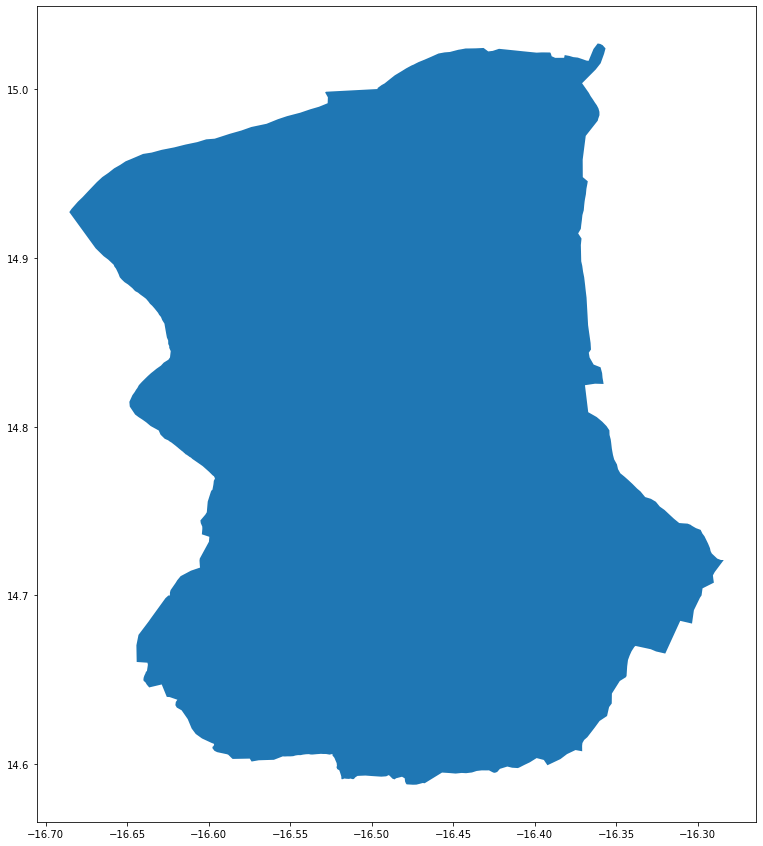

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
df_places.plot(ax=ax)